# Taller 1 - Python en la práctica

### Autores: [Ivan Meresman](https://ivanlmh.github.io/), [Daniel Herrera-Esposito](https://dherrera1911.github.io/)

En la clase 1 de AABC se introdujeron conceptos básicos de Python y del aprendizaje automático. Luego, se introdujo el set de datos **Iris** para armar su primer clasificador.

El objetivo de este taller es poder experimentar un poco con Python para ir ganando confianza con esta herramienta, mientras vamos explorarando algunos otros aspectos del set de datos Iris. Aprovechen para modificar el codigo y probar!

**Nota:** Muchas funciones usadas aquí son copiadas del notebook 3 de la Clase 1. No copiamos las explicaciones de las mismas, pero puede ir a buscarlas al notebook original.

**Nota 2:** Dejamos celdas vacias a lo largo del notebook para que puedan responder aqui mismo. Esperamos que las respuestas a este taller sean en formato _.ipynb_.

In [1]:
# Comenzamos importando los paquetes necesarios, y cargando el set de datos

import numpy as np # paquete con funcionalidades matemáticas
from scipy import stats # paquete con funcionalidades estadísticas
from sklearn import datasets # paquete con sets de datos
from sklearn import model_selection # paquete que divide train y test set
import pandas # paquete que permite manipular datos con formato de tabla
from pandas import plotting as pandas_plot # funciones para graficar datos de tablas
import matplotlib.pyplot as plt # funciones generales para graficar
#
# cargamos los datos de IRIS
#
iris_dataset = datasets.load_iris()
#
# como en el cuaderno 1-3, extraemos los datos y etiquetas
#
caracteristicas = iris_dataset['feature_names'] # nombres de las características
muestras = iris_dataset['data'] # datos que describen a cada flor
especies = iris_dataset['target_names'] # nombres de las etiquetas objetivo
etiquetas = iris_dataset['target'] # número que indica la especie de cada flor (lo que queremos predecir)
#
# también importamos el modelo de KNN
from sklearn.neighbors import KNeighborsClassifier # traemos el clasificador de KNN del paquete

## Ejercicio 1: Visualización del dataset

En la primera clase se señaló la relevancia de visualizar los datos que uno va a analizar. Visualizando los datos podemos extraer información importante para guiar nuestro análisis. Pongamos a prueba la intuición visual con los datos del Iris.

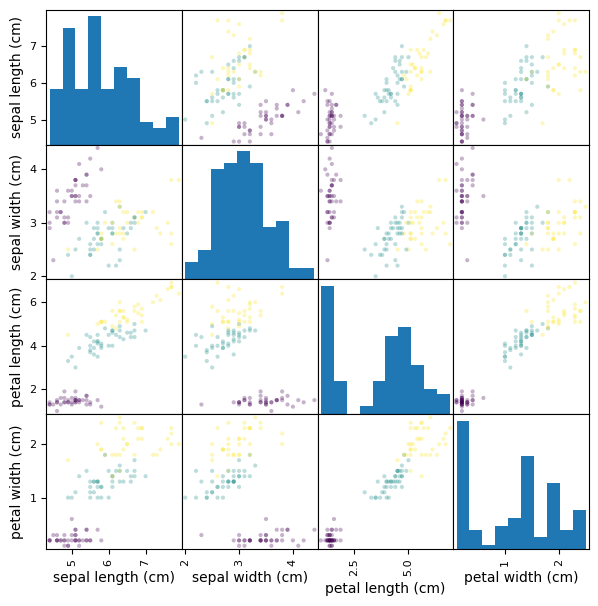

In [24]:
#Repetimos el código del notebook de la clase 1, donde:

# Separamos el dataset en un conjunto de entrenamiento y otro de testeo
x_train, x_test, y_train, y_test = model_selection.train_test_split(muestras, etiquetas)
#
# hacemos un scatter plot de las propiedades de las diferentes flores Iris
tabla_iris = pandas.DataFrame(x_train, columns=iris_dataset.feature_names)
grr = pandas_plot.scatter_matrix(tabla_iris, c=y_train, alpha=0.3, figsize=(7,7))

En el scatter plot anterior, vemos cómo se distribuyen las características (indicadas por los nombres en los ejes) de cada especie de flor. Intuitivamente, si las especies se ven bien separadas en una gráfica, deberíamos poder clasificarlas bien usando estas características. 

### Ejercicio 1

Antes de continuar con el análisis, piense en las siguientes preguntas en base a los scatter plots realizados.
* ¿Qué pares de características espera que generen una mejor clasificación?
* ¿Cuáles espera que generen una peor clasificación?

**Pregunta 1.1:** Explique brevemente sus hipótesis sobre estas preguntas.

*Escriba su respuesta aquí:*

Con el código de la siguiente celda puede poner a prueba sus hipótesis.
El código permite seleccionar las características del Iris que se utilizarán en la clasificación.

In [54]:
# Seleccionamos las variables que usaremos para ajustar el modelo
# Recuerde que las variables posibles son:
# "sepal length (cm)", "sepal width (cm)", "petal length (cm)" y "petal width (cm)"
#

#### MODIFICABLE ####
variables_usadas = ["sepal length (cm)", "petal length (cm)"]
#####################

# Extraemos los índices de las columnas que corresponden a esos nombres, usando list comprehensions
indices_usados = [i for i, val in enumerate(caracteristicas) if val in variables_usadas]

# Con los índices, armamos un nuevo x_train y x_test con sólo las columnas especificadas
x_train_modificado = x_train[:, indices_usados]
x_test_modificado = x_test[:, indices_usados]

# Ajustamos un modelo KNN a los datos de las columnas seleccionadas
knn = KNeighborsClassifier(n_neighbors=1) # creamos el clasificador
knn.fit(x_train_modificado, y_train) # lo ajustamos a los datos

# Evaluamos el rendimiento del modelo en el set de testeo
y_predichos = knn.predict(x_test_modificado) # obtenemos las predicciones del modelo
es_correcto = (y_predichos == y_test) # comparamos con las etiquetas reales, para ver si son correctas
score = 100 * np.mean(es_correcto) # porcentaje: 100 x fracción de inferencias correctas
score = np.round(score) # redondeamos

# chequeamos haber extraído las columnas bien
variables_realmente_usadas = [caracteristicas[i] for i in indices_usados]

# Imprimimos el resultado
print(f'\n Utilizando las columnas {variables_realmente_usadas}, hay un {score}% de respuestas correctas.\n')


 Utilizando las columnas ['sepal length (cm)', 'petal length (cm)'], hay un 87.0% de respuestas correctas.



**Pregunta 1.2:** Explique si sus hipótesis sobre qué pares de características permiten mejor clasificación se cumplieron o no. 

*Escriba su respuesta aquí*

**Extra 1.1:** A partir de los scatter plots de pares de variables arriba, hipotetice sobre qué variables mostrarán el mejor y el peor rendimiento cuando son usadas de forma individual.

Para visualizar esto de forma mas directa, podemos usar un histograma donde se vean las tres clases. Graficamos esto usando la funcion _plt.hist()_.

**Extra 1.2:**  Ponga a prueba su hipótesis con la celda de código anterior, y explique si se cumple o no en base al resultado.

*Escriba su respuesta aquí*

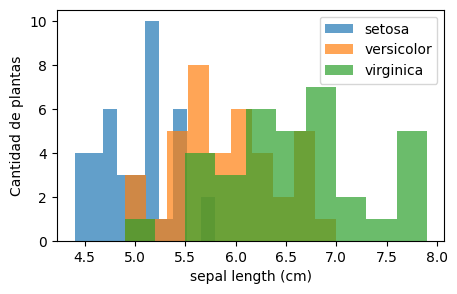

In [61]:
#### MODIFICABLE ####
variable_usada = "sepal length (cm)"
#####################

tabla_iris = pandas.DataFrame(x_train, columns=iris_dataset.feature_names)
tabla_iris_target = pandas.DataFrame(y_train, columns=["label"])

# Grafica 3 histogramas solapados, el parametro alpha le da transparencia a las columnas
plt.figure(figsize=(5,3))
plt.hist(tabla_iris[variable_usada][tabla_iris_target["label"]==0], label=[iris_dataset['target_names'][0]], alpha=0.7)
plt.hist(tabla_iris[variable_usada][tabla_iris_target["label"]==1], label=[iris_dataset['target_names'][1]], alpha=0.7)
plt.hist(tabla_iris[variable_usada][tabla_iris_target["label"]==2], label=[iris_dataset['target_names'][2]], alpha=0.7)
plt.ylabel('Cantidad de plantas')
plt.xlabel(variable_usada)
plt.legend()
plt.show()

## Ejercicio 2: Análisis de parámetros del modelo

En aprendizaje automático, es común que debamos elegir algunos parámetros del modelo antes de comenzar. **Nota:** En aprendizaje automático se llama *hiperparámetros* a estos parámetros del modelo que se eligen a priori. 

En el caso de KNN, el modelo tiene el parámetro `n_neighbors`, que indica cuántos vecinos utilizar para la clasificación. Hasta ahora utilizamos sólo 1 vecino para la clasificación, es decir, clasificamos a cada punto nuevo con la etiqueta de su vecino más cercano.

### Parte 1
**Pregunta 2.1:** Según su intuición (y mirando las gráficas), ¿qué espera que ocurra al aumentar el número de vecinos `n_neighbors`? Piense en qué ocurrirá al aumentar `n_neighbors` a valores moderados (e.g. 5-10), al aumentarlo a valores grandes (e.g. 90) que pasará si usamos todos los datos como vecinos (el `x_train` tiene 112 datos).

*Escriba su respuesta aquí*

Ponga a prueba su hipótesis con el bloque de código de abajo.
**Nota:** Use sólo dos variables para la clasificación, sino el rendimiento de modelo es muy alto desde `n_neighbor=1`.

In [55]:
# Seteamos el número de vecinos que usaremos en la clasificación:
#### MODIFICABLE ####
n_vecinos = 1
#####################

# Seteamos las características que usaremos:
#### MODIFICABLE ####
variables_usadas = ["sepal length (cm)", "petal length (cm)"]
#####################

# Preparamos los datos como en el Ejercicio 1
indices_usados   = [i for i, val in enumerate(caracteristicas) if val in variables_usadas] # buscamos los índices de las columnas con los nombres de arriba
x_train_modificado = x_train[:, indices_usados] # seleccionamos las columnas con los índices encontrados
x_test_modificado  = x_test[:, indices_usados]

# creamos el clasificador, usando la cantidad de vecinos definida
knn = KNeighborsClassifier(n_neighbors = n_vecinos) 

# Ajustamos el modelo a los datos de las columnas seleccionadas
knn.fit(x_train_modificado, y_train)

# Evaluamos el rendimiento del modelo en el set de testeo
y_predichos = knn.predict(x_test_modificado) # obtenemos las predicciones del modelo
es_correcto = (y_predichos == y_test) # comparamos con las etiquetas reales, para ver si son correctas
score = 100 * np.mean(es_correcto) # porcentaje: 100 x fracción de inferencias correctas
score = np.round(score) # redondeamos

# chequeamos haber extraído las columnas bien
variables_realmente_usadas = [caracteristicas[i] for i in indices_usados]

# Imprimimos el resultado
print(f'\n Utilizando un número de {n_vecinos} vecinos, con las variables {variables_realmente_usadas} hay un {score}% de respuestas correctas.\n')


 Utilizando un número de 1 vecinos, con las variables ['sepal length (cm)', 'petal length (cm)'] hay un 87.0% de respuestas correctas.



**Pregunta 2.2:** Discuta si su hipótesis se cumplió.

*Escriba su respuesta aquí*

### Parte 2
**Pregunta 2.3:** Para practicar Python, use un loop *for* para *iterar* a través de los valores de 1 a 100 para `n_neighbors`, y grafique (o en su defecto imprima) el porcentaje de acierto para cada valor de `n_neighbors`.

Sugerencias:
1) En el cuaderno 1.1 se explican los loop *for*
2) Considere que *range(100)* va desde 0 a 99 (como se menciona en el cuaderno 1.1), y que 0 no es un valor válido para K 
3) Puede generar una lista vacía antes del loop, e irla llenando con los valores producidos, usando la función *append* (ver cuaderno 1.1). Ej. si llama a su lista *listita*, puede agregarle la variable *valor_nuevo* usando *listita.append(valor_nuevo)*
4) Finalmente, puede graficar el contenido de *listita* usando matplotlib como en el cuaderno 1.2, usando la función `plt.plot()`

In [ ]:
# Escriba su código aquí:

**Extra 2.1:** ¿Piensa que los resultados del efecto de `n_neighbor` pueden depender de las columnas usadas en la clasificación? Si desea, ponga a prueba su hipótesis.

**Extra 2.2:** Elegir los parámetros de un modelo (por ejemplo, el `n_neighbor`), puede ser una parte importante de un análisis. Conceptualmente, ¿se le ocurre alguna forma de elegir los parámetros "óptimos" para un problema que deba resolver? Piense por ejemplo en el problema de elegir `n_neighbor` en el clasificador que estamos usando ahora.



*Escriba su respuesta aquí* 

## Ejercicio 3: Pre-procesamiento de datos

Además de la visualización, estadísticas de los datos como la media y el desvío estándar de las características son muy útiles para entender los datos.

### Parte 1
**Pregunta 3.1:** Calcule la media ($\mu$) y el desvío estándar ($\sigma$) de las 4 características presentes en el Iris dataset (i.e. las 4 columnas de *tabla_iris* o de *muestras*) . Hágalo de las siguientes dos maneras:

1) Con las funciones .mean() y .std() que provee el paquete pandas (o numpy)

2) Aplicando usted las siguientes fórmulas $ \mu = \frac{\sum x_i}{N}$ y $\sigma = \sqrt{\frac{\sum(x_i-\mu)^2}{N}}$. Use para esto último las herramientas del cuaderno 1.2 del teórico (ej. la función .sum() de numpy, o la función len() que le permite obtener el número de elementos N).


In [ ]:
### Escriba su código aquí ###
media = 
desviacion = 

Muchas veces, el rendimiento de un modelo puede depender de las propiedades estadísticas de los datos (ej. la media, la desviación estándar, el valor máximo y el valor mínimo de las características). Por ello, es común hacer un pre-procesamiento de los datos, modificándolos para optimizar el rendimiento del modelo.

Un tipo de preprocesamiento muy comun es la estandarización de los datos. La estandarización consiste en que a cada característica se le resta su valor medio $\mu$ y se la divide por la desviación estandar $\sigma$, generando una característica estandarizada con $\mu'=0$ y $\sigma'=1$. Cuando utilizamos varias características diferentes en un modelo, este proceso ayuda a darles a todas la misma **escala**.

### Parte 2
**Pregunta 3.2:** Explique intuitivamente porqué el modeo de KNN puede depender de la escala de las variables. (e.g. piense en un caso donde una característica toma valores entre 0-1, y otra entre 0-1000, y el efecto en encontrar vecinos)


**Pregunta 3.3:** Aplique estandarización a todas las columnas, usando la formula $X_{std} = \frac{X-\mu}{\sigma}$ (puede comparar los resultados con los de la funcion del paquete sklearn _preprocessing.scale(X)_ que hace lo mismo). Luego, pruebe el modelo de KNN con los datos estandarizados.

**Nota1:** Tengan en cuenta que deben calcular $\mu$ y $\sigma$ para cada columna de los datos de entrenamiento.

**Nota2:** No olviden aplicarle el pre-processamiento a los datos de test tambien! Un detalle no menor que siempre hay que considerar en machine learning, es que a los datos de test hay que aplicarles el preprocesamento usando los parametros de los datos de entrenamiento. Esto es: $X_{std\_test}=\frac{X_{test}-\mu_{train}}{\sigma_{train}}$

In [58]:
# Nota: Recuerde que cualquier operacion basica (+,-,/,*) que se le haga a una 
# array de datos se aplica a todos los valores del array
ejemplo = np.arange(1,6,step=1)
print(ejemplo)
print(ejemplo - 1)
print(ejemplo / 3)

[1 2 3 4 5]
[0 1 2 3 4]
[0.33333333 0.66666667 1.         1.33333333 1.66666667]


In [60]:
from sklearn import preprocessing
### Escriba su código aquí ###

**Extra 3.1:** Otro método común de preprocesamiento es el de llevar a las variables al rango 0-1, o normalizarlas.

$X_{norm}=\frac{X-x_{min}}{x_{max}-x_{min}}$

Pruebe normalizar el dataset Iris y pruebe el rendimiento del modelo KNN.

## Ejercicio Extra 1: Train & Test sets

Al comienzo de este notebook usamos la funcion [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de sklearn para dividir el Iris dataset, esto divide el dataset de forma tal que, por default, 25% de los datos van para _Xtest_ y el restante 75% se usa para entrenar.

Esto se puede modificar con los parametros *test_size* o *train_size*, junto con otros parametros como *shuffle* (la posibilidad de que el orden de los datos se baraje antes de dividirse en train y test).

¿Cómo creen que puede afectar esto el rendimiento del modelo KNN? Pueden modificar alguno de estos parametros en la segunda celda del notebook y volver a correr todo para ver que sucede.


## Ejercicio Extra 2: Otro dataset

Para profundizar un poco en las herramietas aprendidas, puede repetir estos ejercicios usando el [Penguins Dataset](https://github.com/allisonhorst/palmerpenguins). Se trata de un dataset con una estructura muy similar a Iris, así que es facil extrapolar lo aprendido para aplicar el modelo KNN a estos datos. En este dataset el objetivo es clasificar la especie de pinguino según sus características.

In [ ]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Generación de informe en PDF

Al terminar el taller se debe descomentar y ejecutar la última celda de abajo para generar un PDF con el contenido del notebook resuelto.
El PDF aparecerá entre los archivos del entorno (ícono con forma de carpeta a la izquierda de la pantalla).

In [ ]:
##
## DESCOMENTAR PARA GUARDAR PDF!
##
#%%capture
#!apt-get install --quiet texlive-xetex inkscape pandoc texlive-fonts-recommended texlive-generic-recommended
#!pip install --quiet nbconvert
#!jupyter nbconvert --to pdf /content/drive/MyDrive/Cursos/AABC/Clases/aabc-practico4-1-representacion.ipynb